# Bag of Words (BOW)

In [3]:
# kras Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


In [6]:
# scikit-learn CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}
단어장(Vocabulary)의 크기 : 10


# Document-Term Matrix (DTM)
- 행: 문서
- 열: 단어
- 벡터간 유사도
    - 코사인 유사도 

예시)

Doc 1: Intelligent applications creates intelligent business processes

Doc 2: Bots are intelligent applications

Doc 3: I do business intelligence

| Document | applications | are | bots | business | creates | do | i | intelligence | intelligent | processes |
|----------|--------------|-----|------|----------|---------|----|---|--------------|-------------|-----------|
| Doc 1    |      1       |  0  |  0   |    1     |    1    | 0  | 0 |      0       |      2      |     1     |
| Doc 2    |      1       |  1  |  1   |    0     |    0    | 0  | 0 |      0       |      1      |     0     |
| Doc 3    |      0       |  0  |  0   |    1     |    0    | 1  | 1 |      1       |      0      |     0     |


실습)

doc1 : I like dog<br>
doc2 : I like cat<br>
doc3 : I like cat I like cat<br>

| Document | cat | dog | i | like |
|----------|-----|-----|---|------|
| doc1    |  0  |  1  | 1 |  1   |
| doc2    |  1  |  0  | 1 |  1   |
| doc3    |  2  |  0  | 2 |  2   |


In [9]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # doc1 벡터
doc2 = np.array([1,0,1,1]) # doc2 벡터
doc3 = np.array([2,0,2,2]) # doc3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

- 코사인 유사도: 텍스트분석, 추천시스템, 이미지처리 등에서 활용

In [12]:
print(f'문서1과 문서2의 코사인 유사도: {cos_sim(doc1, doc2):.2f}')
print(f'문서1과 문서3의 코사인 유사도: {cos_sim(doc1, doc3):.2f}') 
print(f'문서2과 문서3의 코사인 유사도: {cos_sim(doc2, doc3):.2f}') 

문서1과 문서2의 코사인 유사도: 0.67
문서1과 문서3의 코사인 유사도: 0.67
문서2과 문서3의 코사인 유사도: 1.00


## DTM 구현

In [19]:
corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


- DTM은 bag of words 기반, 문서를 비교할 수 있는 행렬
- 한계점 두 가지
    - 문서 수와 단어 수가 늘어날수록 희소행렬이 됨
    - 단어의 빈도에만 집중하는데서 오는 문제점 (the, a 등 문맥과 상관없이 빈도가 높은 단어들)

# Term Frequency-Inverse Document Frequency (TF-IDF)
- DTM 한계점 대응방법
- 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단 (a, the 등)
- 불용어로 인한 단어 노이즈 완화 효과


## TF-IDF 구현

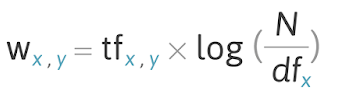

In [18]:
from math import log
import pandas as pd

In [20]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

In [22]:
# dtm 만들기 - 통합 단어장 생성
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


In [25]:
# 총 문서 수
N = len(docs)
N

3

In [26]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [33]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


In [34]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


In [35]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


## scikit-learn TFidVectorizer 활용

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = tfidfv.get_feature_names_out())
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634
